In [1]:
# ==========================================
# 📌 Step 1: Import Libraries
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# ==========================================
# 📌 Step 2: Load Dataset
# ==========================================

df = pd.read_csv("../data/co2_emissions (1).csv")  # Update name if needed
df.head()


,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   make                            7385 non-null   object 
 1   model                           7385 non-null   object 
 2   vehicle_class                   7385 non-null   object 
 3   engine_size                     7385 non-null   float64
 4   cylinders                       7385 non-null   int64  
 5   transmission                    7385 non-null   object 
 6   fuel_type                       7385 non-null   object 
 7   fuel_consumption_city           7385 non-null   float64
 8   fuel_consumption_hwy            7385 non-null   float64
 9   fuel_consumption_comb(l/100km)  7385 non-null   float64
 10  fuel_consumption_comb(mpg)      7385 non-null   int64  
 11  co2_emissions                   7385 non-null   int64  
dtypes: float64(4), int64(3), object(5)

In [3]:
df.describe()


,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [4]:
df.isnull().sum()


make                              0
model                             0
vehicle_class                     0
engine_size                       0
cylinders                         0
transmission                      0
fuel_type                         0
fuel_consumption_city             0
fuel_consumption_hwy              0
fuel_consumption_comb(l/100km)    0
fuel_consumption_comb(mpg)        0
co2_emissions                     0
dtype: int64

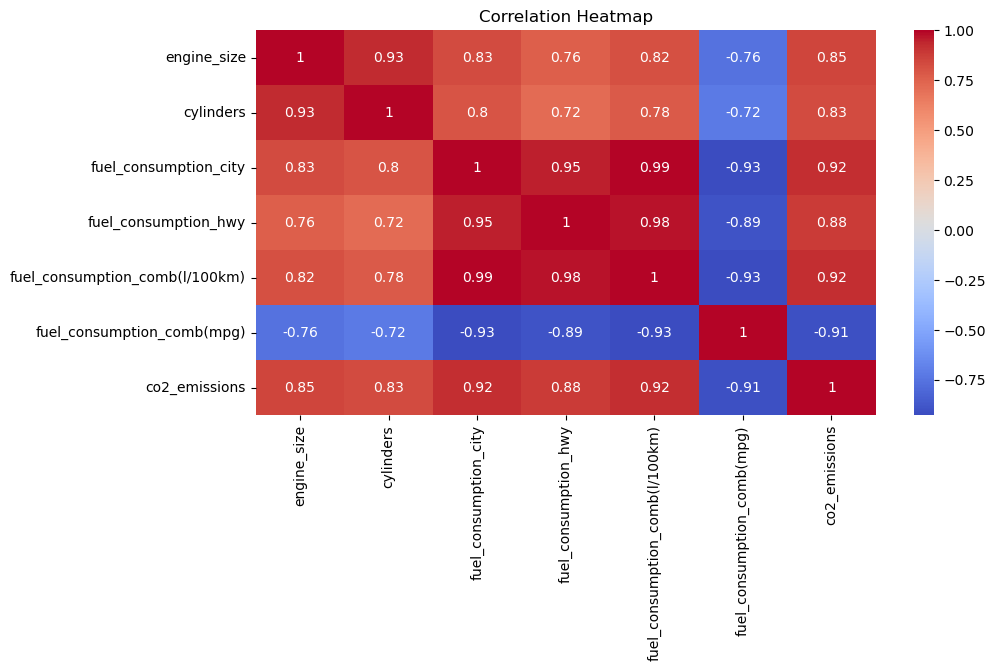

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10,5))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [7]:
df.select_dtypes(include='object').nunique()


make               42
model            2053
vehicle_class      16
transmission        5
fuel_type           5
dtype: int64

In [8]:
df.select_dtypes(include='object').head()


,make,model,vehicle_class,transmission,fuel_type
0,ACURA,ILX,COMPACT,AS,Z
1,ACURA,ILX,COMPACT,M,Z
2,ACURA,ILX HYBRID,COMPACT,AV,Z
3,ACURA,MDX 4WD,SUV - SMALL,AS,Z
4,ACURA,RDX AWD,SUV - SMALL,AS,Z


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Step 1: Define features and target using correct column name
X = df.drop("co2_emissions", axis=1)
y = df["co2_emissions"]

# Step 2: Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Step 3: Preprocessing using OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ],
    remainder='passthrough'
)

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)
print("Categorical columns:", categorical_cols)


Train size: (5908, 11)
Test size: (1477, 11)
Categorical columns: ['make', 'model', 'vehicle_class', 'transmission', 'fuel_type']


In [11]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Build training pipeline
model = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('rf', RandomForestRegressor(random_state=42))
])

# Train model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print("----------------------------")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.3f}")


Model Performance:
----------------------------
RMSE: 3.55
R² Score: 0.996


In [12]:
import joblib

# Save the model
joblib.dump(model, "co2_model.pkl")

print("Model saved successfully.")


Model saved successfully.
